# Data Exploration

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datagen=ImageDataGenerator(rescale=1./255,
    validation_split=0.20)

batch_size=64   
data_dir = 'new_extended_dataset/original'
target_size = 200

train_data = datagen.flow_from_directory(data_dir,
    target_size=(target_size,target_size),
    class_mode="categorical", 
    batch_size=batch_size, 
    subset="training")

val_data = datagen.flow_from_directory(data_dir,
    target_size=(target_size,target_size),
    class_mode="categorical", 
    batch_size=batch_size, 
    subset="validation")

Found 7734 images belonging to 8 classes.
Found 1930 images belonging to 8 classes.


In [3]:
train_images, train_labels = train_data.next()
val_images, val_labels = val_data.next()
print(train_images.shape, train_images.dtype)
print(val_images.shape, val_images.dtype)

train_labels_shaped = np.array([])
for i in train_labels:
    i = np.where(i == 1)
    train_labels_shaped = np.append([train_labels_shaped],[i])

val_labels_shaped = np.array([])
for i in val_labels:
    i = np.where(i == 1)
    val_labels_shaped = np.append([val_labels_shaped],[i])

train_labels_shaped = train_labels_shaped.astype("uint8")
val_labels_shaped = val_labels_shaped.astype("uint8")

print(train_labels.shape)
print(val_labels.shape)
print(train_labels_shaped.shape)
print(val_labels_shaped.shape)

print(np.bincount(train_labels_shaped))
print(np.bincount(val_labels_shaped))

(64, 200, 200, 3) float32
(64, 200, 200, 3) float32
(64, 8)
(64, 8)
(64,)
(64,)
[12  5  8 10  6 10  5  8]
[ 8 11 11 11  5  4  5  9]


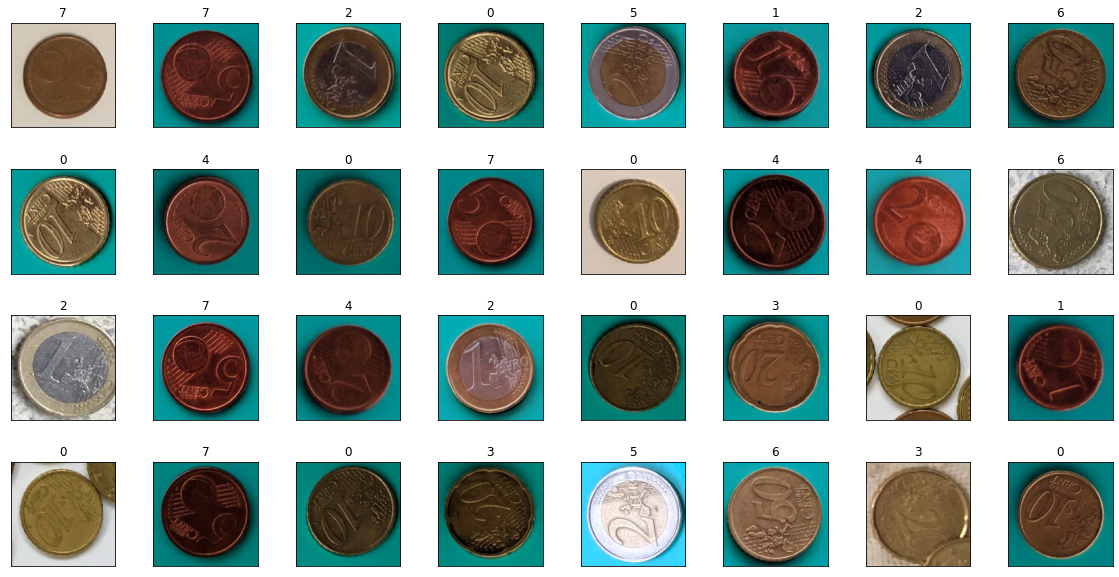

In [4]:
fig1 = plt.figure(figsize=(20,10))
fig1.subplots_adjust(wspace=0.2, hspace=0.4)

# Lets show the first 32 images of a batch
for i, img in enumerate(train_images[:32]):
    ax = fig1.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    plt.title(np.argmax(train_labels[i]))